In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import statsmodels.api as sm
%matplotlib inline

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
#trainデータ
df=pd.read_csv("/Users/masanoritakahashi/Documents/forecast_PM2.5/modefied_data/rohini_1016_6hours.csv").iloc[:,1:]
#検証用データ
test=pd.read_csv("/Users/masanoritakahashi/Documents/forecast_PM2.5/modefied_data/rohini_1113_6hours.csv").iloc[:,1:]

In [9]:
f=lambda x:datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

df["local_time"]=df["local_time"].apply(f)
test["local_time"]=test["local_time"].apply(f)

# 可視化  
## 可視化の3種類
1.  データをplot(直接表示)  
データが定常過程に従っていることを確認
2. 時間相関の可視化(相関関数)  
3. 周期性を可視化(スペクトル、ピリオグラム)

## plot

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


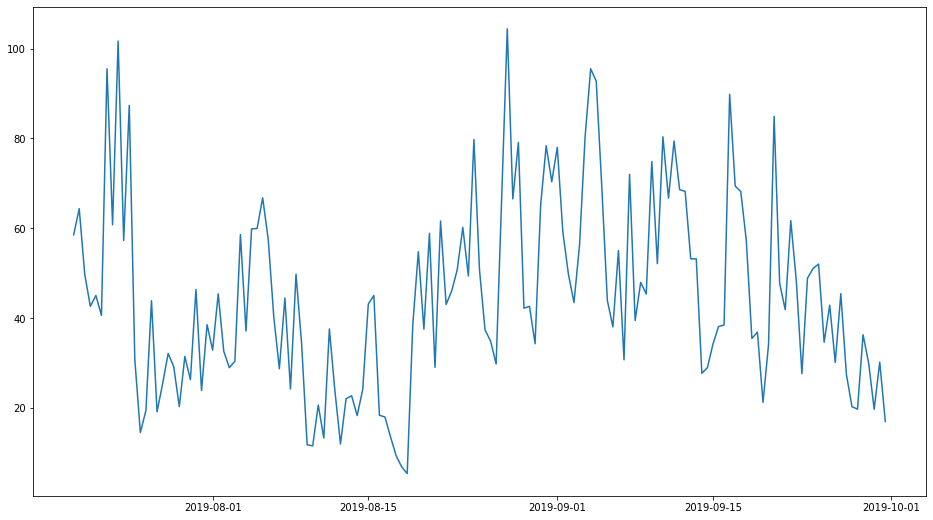

In [10]:
ts=df["rohini"].interpolate('linear')
ts.index=df["local_time"]

plt.figure(figsize=(16,9))
plt.plot(ts)

In [36]:
#log

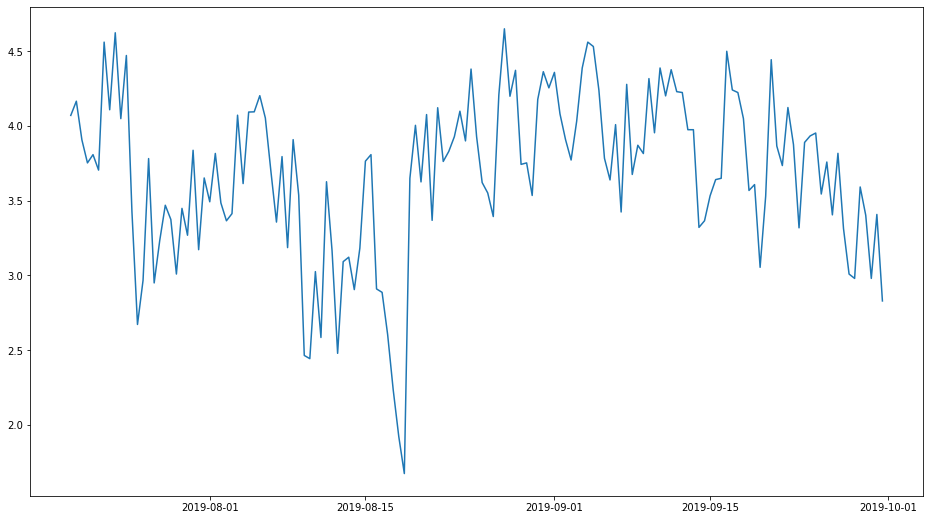

In [37]:
plt.figure(figsize=(16,9))
plt.plot(np.log(ts))

In [ ]:
#一回階差
#階差を取るとトレンドが消える

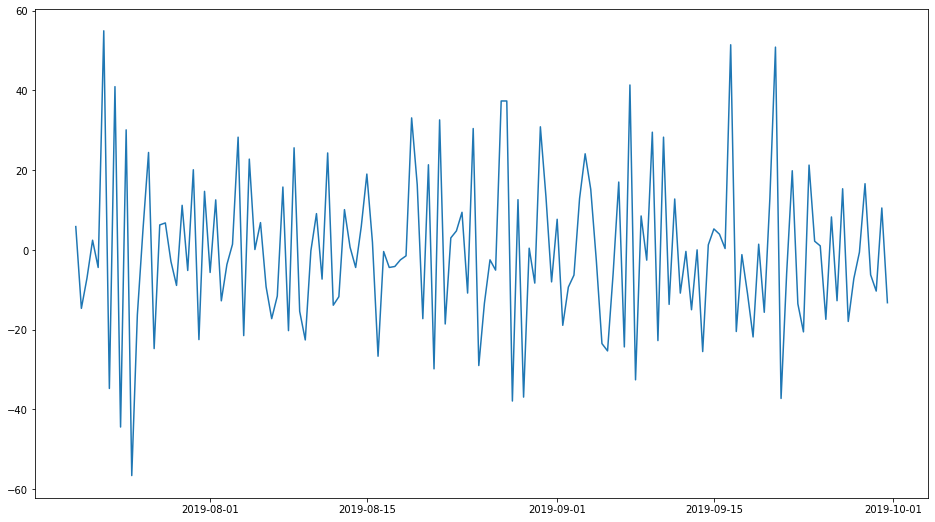

In [35]:
plt.figure(figsize=(16,9))
plt.plot(ts.diff())

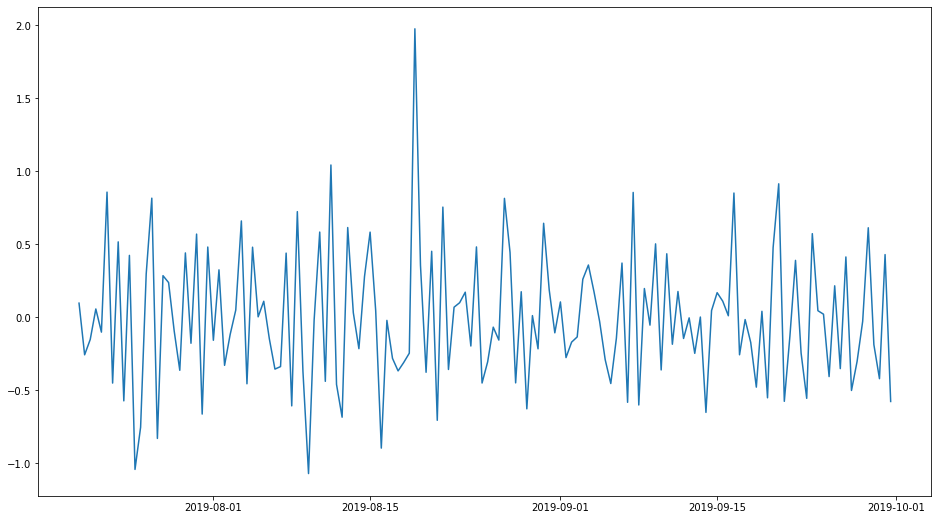

In [39]:
plt.figure(figsize=(16,9))
plt.plot(np.log(ts).diff())

## 考察  
  
- 定常性はなさそう  
- 周期性はありそう
- 正値、上下非対称(y>0)  
- ややトレンドあり？？  


## ヒストグラム

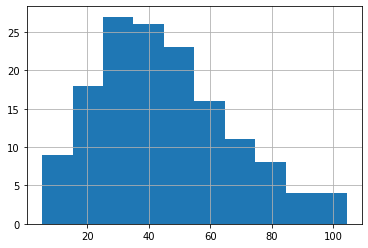

In [24]:
df["rohini"].hist()

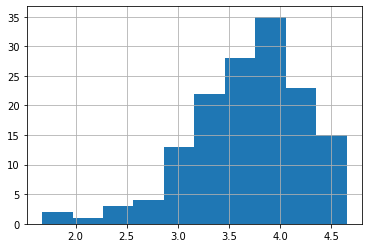

In [23]:
np.log(df["rohini"]).hist()

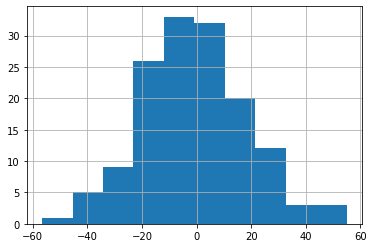

In [31]:
df["rohini"].diff(1).dropna().hist()

# 自己相関plot

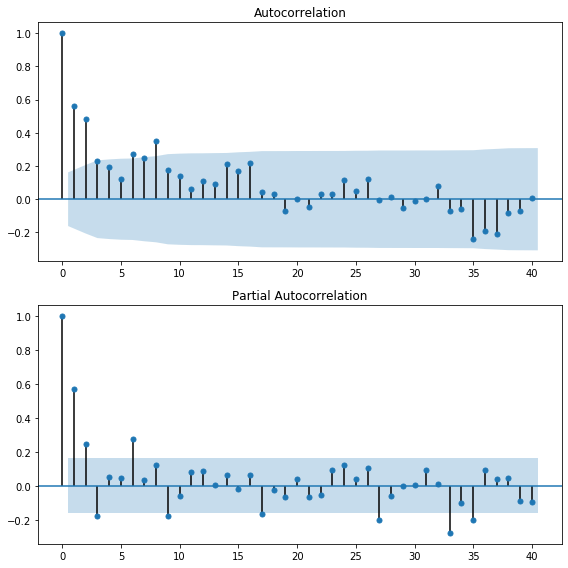

In [44]:
#自己相関係数の出力
ts_acf=sm.tsa.stattools.acf(ts.values, nlags=40)

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1) 

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2) 

plt.tight_layout() 

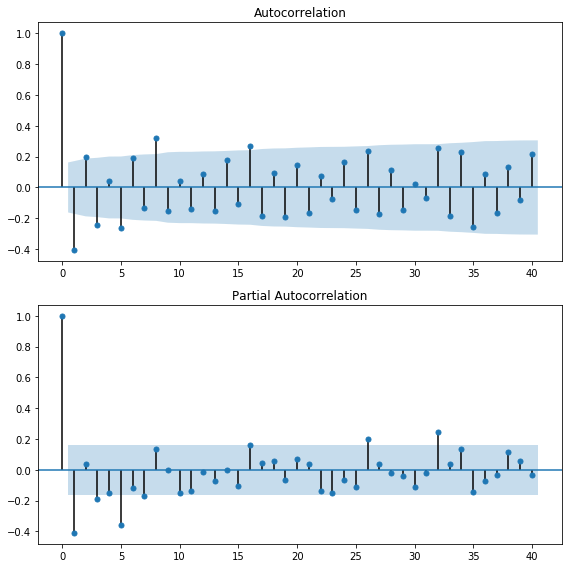

In [54]:
##一回階差の自己相関

fig = plt.figure(figsize=(8, 8))
# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ts.diff().dropna() , lags=40, ax=ax1) 

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(ts.diff().dropna(), lags=40, ax=ax2) 

plt.tight_layout() 

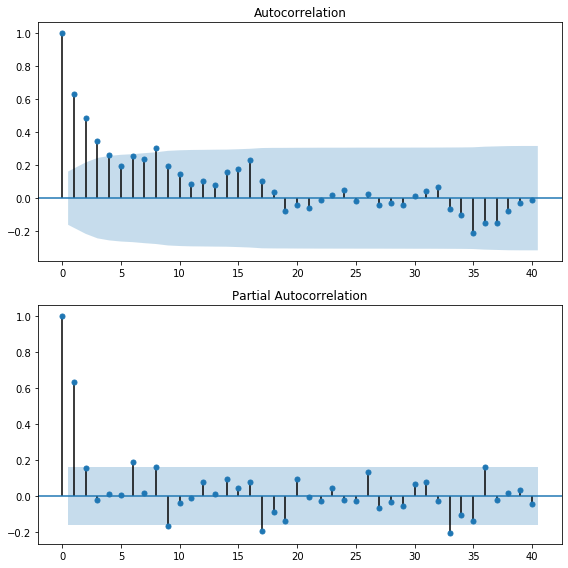

In [58]:
##一回階差の自己相関

fig = plt.figure(figsize=(8, 8))
# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(np.log(ts) , lags=40, ax=ax1) 

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(np.log(ts), lags=40, ax=ax2) 

plt.tight_layout() 

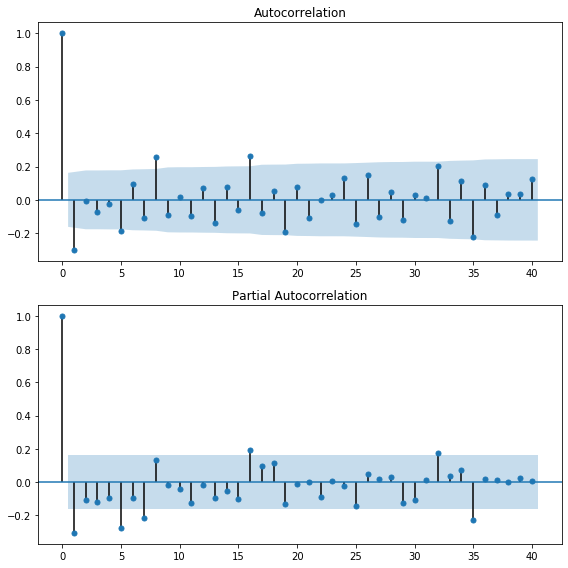

In [57]:
##対数変換の一回階差の自己相関

fig = plt.figure(figsize=(8, 8))
# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(np.log(ts).diff().dropna() , lags=40, ax=ax1) 

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(np.log(ts).diff().dropna(), lags=40, ax=ax2) 

plt.tight_layout() 